# EDA - Project "King County House Sales"
Author: Marvin Lorenzen, lorenzen-marvin1995@gmail.com

In [602]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sms
import numpy as np
import geopandas as gpd
import statsmodels.api as sm
import plotly.figure_factory as ff

%matplotlib inline

In [603]:
map_data_shp = gpd.read_file("Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area-shp/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp")
map_data = pd.read_csv("Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.csv")
KCHsales_df = pd.read_csv("King_County_House_prices_dataset.csv")

## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - Date house was sold
* **yr_sale** - Year the house was sold
* **mth_sale** - Month the house was sold
* **price** -  Price of the house
* **bedrooms** - Numbers of Bedrooms/House
* **bathrooms** - Numbers of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## first overview of the data

In [398]:
KCHsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [399]:
KCHsales_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [400]:
KCHsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [401]:
KCHsales_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [402]:
KCHsales_df.shape

(21597, 21)

In [403]:
KCHsales_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Business understanding and data cleaning

## incomplete data

In [404]:
incomplete = pd.DataFrame(KCHsales_df.isnull().sum(), columns=["count"])
incomplete["relationship"] = incomplete["count"]/21597*100
incomplete[incomplete["count"]!=0]

,count,relationship
waterfront,2376,11.001528
view,63,0.291707
yr_renovated,3842,17.789508


In [405]:
KCHsales_df.shape

(21597, 21)

In [406]:
KCHsales_df.dropna().shape

(15762, 21)

- waterfront, view, yr_renovated have incomplete data
- with 18% the column yr_renoveted has the most missing entries
- to continue working with all the data, I replace the NaN data against the median
- there is a systematic for the missing data?

In [407]:
KCHsales_df[["waterfront", "view", "yr_renovated"]].describe()

,waterfront,view,yr_renovated
count,19221.000000,21534.000000,17755.000000
mean,0.007596,0.233863,83.636778
std,0.086825,0.765686,399.946414
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


In [408]:
KCHsales_df["waterfront"] = KCHsales_df["waterfront"].fillna(value=0)
KCHsales_df["view"] = KCHsales_df["view"].fillna(value=0)
KCHsales_df["yr_renovated"] = KCHsales_df["yr_renovated"].fillna(value=0)
KCHsales_df.dropna().shape

(21597, 21)

## label: "price"

(array([1.9053e+04, 2.1180e+03, 2.9800e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  78000.,  840200., 1602400., 2364600., 3126800., 3889000.,
        4651200., 5413400., 6175600., 6937800., 7700000.]),
 <a list of 10 Patch objects>)

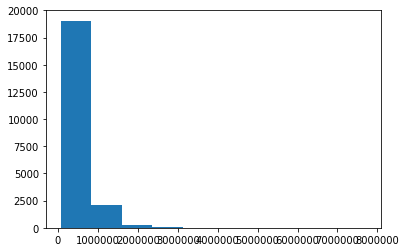

In [604]:
plt.hist(KCHsales_df['price'])

In [606]:
plt.hist(KCHsales_df[[KCHsales_df['price']<1000000]])

ValueError: Item wrong length 1 instead of 21597.

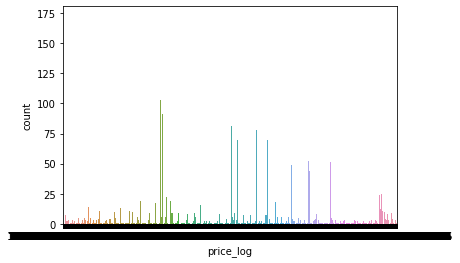

In [589]:
KCHsales_df["price_log"] = np.log(KCHsales_df["price"])
sns.countplot(KCHsales_df["price_log"]) #,order=KCHsales_df["price_log"].value_counts().index);

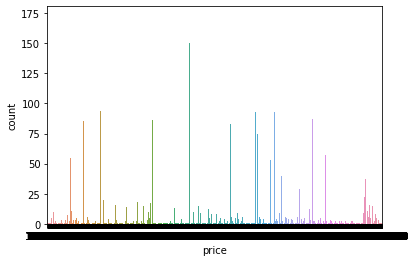

In [588]:
sns.countplot(KCHsales_df["price"]) #,order=KCHsales_df["price"].value_counts().index);

## column "date"

In [409]:
newdate = KCHsales_df["date"].str.split("/", expand=True)
KCHsales_df["yr_sale"] = pd.to_numeric(newdate[2])
KCHsales_df["mth_sale"] = pd.to_numeric(newdate[0])
KCHsales_df.info()
KCHsales_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
yr_sale          21597 non-null int64
mth_sale         21597 non-null int64

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sale,mth_sale
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2


In [410]:
KCHsales_df.drop("date", axis =1, inplace=True)
KCHsales_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sale,mth_sale
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2


In [411]:
X = KCHsales_df[["mth_sale"]]
X = sms.add_constant(X)

y = KCHsales_df[["price"]]

model = sms.OLS(y, X)
results = model.fit()
results.summary()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.129
Date:                Mon, 08 Jun 2020   Prob (F-statistic):              0.145
Time:                        22:48:11   Log-Likelihood:            -3.0739e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.48e+05   5837.780     93.870      0.000    5.37e+05    5.59e+05
mth_sale   -1170.8717    802.485     -1.459      0.145   -2743.801     402.058
==============================================================================
Omnibus:                    19108.430   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1133360.178
Skew:                           4.024   Prob(JB):                         0.00
Kurtosis:                      37.564   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0, 14)

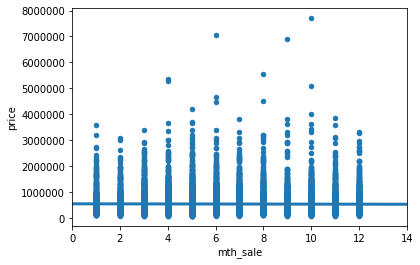

In [412]:
intercept, slope = results.params
ax = KCHsales_df.plot("mth_sale","price", kind="scatter")
xx = np.linspace(0, 15, 100)
ax.plot(xx, xx*slope + intercept, lw=3)
ax.set_xlim([0, 14])

In [413]:
X1 = KCHsales_df[["yr_sale"]]
X1 = sms.add_constant(X1)

y1 = KCHsales_df[["price"]]

model1 = sms.OLS(y1, X1)
results1 = model1.fit()
results1.summary()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3000
Date:                Mon, 08 Jun 2020   Prob (F-statistic):              0.584
Time:                        22:48:12   Log-Likelihood:            -3.0739e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.358e+06   1.08e+07     -0.498      0.619   -2.65e+07    1.57e+07
yr_sale     2928.0941   5346.010      0.548      0.584   -7550.480    1.34e+04
==============================================================================
Omnibus:                    19104.341   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1131922.786
Skew:                           4.023   Prob(JB):                         0.00
Kurtosis:                      37.542   Cond. No.                     8.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(2012, 2016)

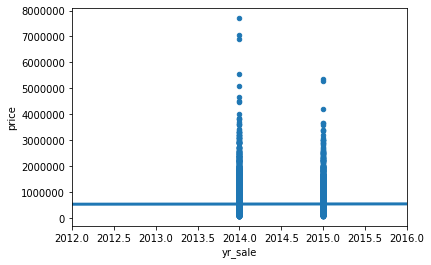

In [414]:
intercept, slope = results1.params
ax = KCHsales_df.plot("yr_sale","price", kind="scatter")
xx = np.linspace(2000, 2025, 100)
ax.plot(xx, xx*slope + intercept, lw=3)
ax.set_xlim([2012, 2016])

- The month and year in which the house was sold have no significant influence on the price

## column bathrooms and bedrooms

In [415]:
#bathrooms - Numbers of bathrooms/bedrooms
KCHsales_df.eval("total_bathrooms = bathrooms * bedrooms", inplace =True)
KCHsales_df.rename(columns={"bathrooms" : "bathrooms_per_bedrooms"}, inplace =True)
KCHsales_df.head(15)

,id,price,bedrooms,bathrooms_per_bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sale,mth_sale,total_bathrooms
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10,3.00
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,6.75
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2,2.00
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12,12.00
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2,6.00
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,5,18.00
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,1995,0.0,98003,47.3097,-122.327,2238,6819,2014,6,6.75
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,...,1963,0.0,98198,47.4095,-122.315,1650,9711,2015,1,4.50
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,1960,0.0,98146,47.5123,-122.337,1780,8113,2015,4,3.00
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,...,2003,0.0,98038,47.3684,-122.031,2390,7570,2015,3,7.50


In [416]:
KCHsales_df[["total_bathrooms", "bedrooms", "bathrooms_per_bedrooms"]]

,total_bathrooms,bedrooms,bathrooms_per_bedrooms
0,3.00,3,1.00
1,6.75,3,2.25
2,2.00,2,1.00
3,12.00,4,3.00
4,6.00,3,2.00
5,18.00,4,4.50
6,6.75,3,2.25
7,4.50,3,1.50
8,3.00,3,1.00
9,7.50,3,2.50


In [417]:
X2 = KCHsales_df[["bathrooms_per_bedrooms"]]
X2 = sms.add_constant(X2)

y2 = KCHsales_df[["price"]]

model2 = sms.OLS(y2, X2)
results2 = model2.fit()
results2.summary()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:48:12   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms_per_bedrooms  2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0, 10)

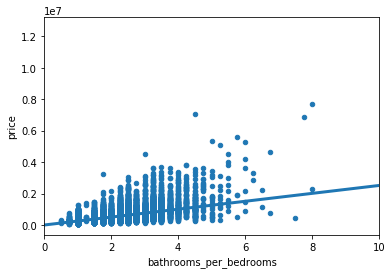

In [418]:
intercept, slope = results2.params
ax = KCHsales_df.plot("bathrooms_per_bedrooms", "price", kind="scatter")
xx = np.linspace(0, 50, 100)
ax.plot(xx, xx*slope + intercept, lw=3)
ax.set_xlim([0, 10])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     7872.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:48:13   Log-Likelihood:            -3.0403e+05
No. Observations:               21597   AIC:                         6.081e+05
Df Residuals:                   21595   BIC:                         6.081e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.03e+05   4362.372     

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(0, 70)

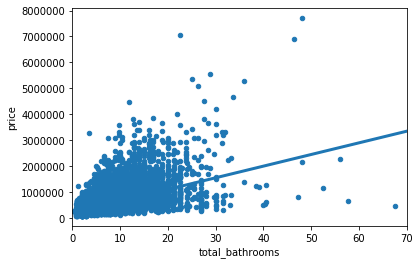

In [419]:
X3 = KCHsales_df[["total_bathrooms"]]
X3 = sms.add_constant(X3)

y3= KCHsales_df[["price"]]

model3 = sms.OLS(y3, X3)
results3 = model3.fit()
print(results3.summary())

intercept, slope = results3.params
ax = KCHsales_df.plot("total_bathrooms", "price", kind="scatter")
xx = np.linspace(0, 100, 100)
ax.plot(xx, xx*slope + intercept, lw=3)
ax.set_xlim([0, 70])

In [420]:
X4 = KCHsales_df[["bedrooms"]]
X4 = sms.add_constant(X4)

y4= KCHsales_df[["price"]]

model4 = sms.OLS(y4, X4)
results4 = model4.fit()
results4.summary()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:48:13   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

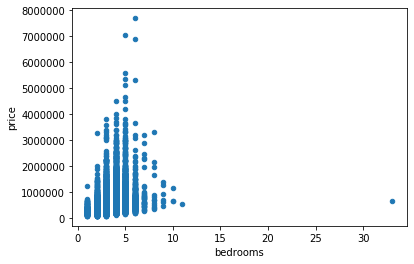

In [421]:
KCHsales_df.plot(x='bedrooms', y='price', kind='scatter');

In [582]:
KCHsales_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [609]:
sns.countplot(KCHsales_df["bedrooms"]),order=KCHsales_df['bedrooms'].value_counts().index)

SyntaxError: invalid syntax (<ipython-input-609-e7edda7e2d82>, line 1)

- with R = 0.277, the varible bathrooms_per_badrooms has the greatest explanatory content
- the variable bedrooms has no linaer relationship. It looks like there is an apex for 5 bedrooms
- also we have a big outlier in this variable with more than 30 bedrooms

## columns property

In [422]:
KCHsales_df[["sqft_living", "sqft_lot", "sqft_basement", "sqft_above", "floors"]]

,sqft_living,sqft_lot,sqft_basement,sqft_above,floors
0,1180,5650,0.0,1180,1.0
1,2570,7242,400.0,2170,2.0
2,770,10000,0.0,770,1.0
3,1960,5000,910.0,1050,1.0
4,1680,8080,0.0,1680,1.0
5,5420,101930,1530.0,3890,1.0
6,1715,6819,?,1715,2.0
7,1060,9711,0.0,1060,1.0
8,1780,7470,730.0,1050,1.0
9,1890,6560,0.0,1890,2.0


In [423]:
#Test, ob die Aussage immer zustimmt sqft_basement = sqft_living - sqft_above
k_df = KCHsales_df[["sqft_living", "sqft_lot", "sqft_basement", "sqft_above", "floors"]][KCHsales_df["sqft_basement"]!= "?"]
#print(pd.to_numeric(k_df["sqft_living"] - k_df["sqft_above"], downcast="float"),k_df["sqft_basement"])
k2 = pd.to_numeric(k_df["sqft_basement"], downcast="float") == pd.to_numeric(k_df["sqft_living"] - k_df["sqft_above"], downcast= "float")
k2.value_counts()

True    21143
dtype: int64

In [424]:
KCHsales_df["sqft_basement2"]= KCHsales_df["sqft_living"] - KCHsales_df["sqft_above"]
KCHsales_df.info()
KCHsales_df.drop("sqft_basement", axis=1, inplace=True)
KCHsales_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
id                        21597 non-null int64
price                     21597 non-null float64
bedrooms                  21597 non-null int64
bathrooms_per_bedrooms    21597 non-null float64
sqft_living               21597 non-null int64
sqft_lot                  21597 non-null int64
floors                    21597 non-null float64
waterfront                21597 non-null float64
view                      21597 non-null float64
condition                 21597 non-null int64
grade                     21597 non-null int64
sqft_above                21597 non-null int64
sqft_basement             21597 non-null object
yr_built                  21597 non-null int64
yr_renovated              21597 non-null float64
zipcode                   21597 non-null int64
lat                       21597 non-null float64
long                      21597 non-null float64
sqft_living15             21

,id,price,bedrooms,bathrooms_per_bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sale,mth_sale,total_bathrooms,sqft_basement2
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,98178,47.5112,-122.257,1340,5650,2014,10,3.00,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,6.75,400
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,98028,47.7379,-122.233,2720,8062,2015,2,2.00,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0.0,98136,47.5208,-122.393,1360,5000,2014,12,12.00,910
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,98074,47.6168,-122.045,1800,7503,2015,2,6.00,0


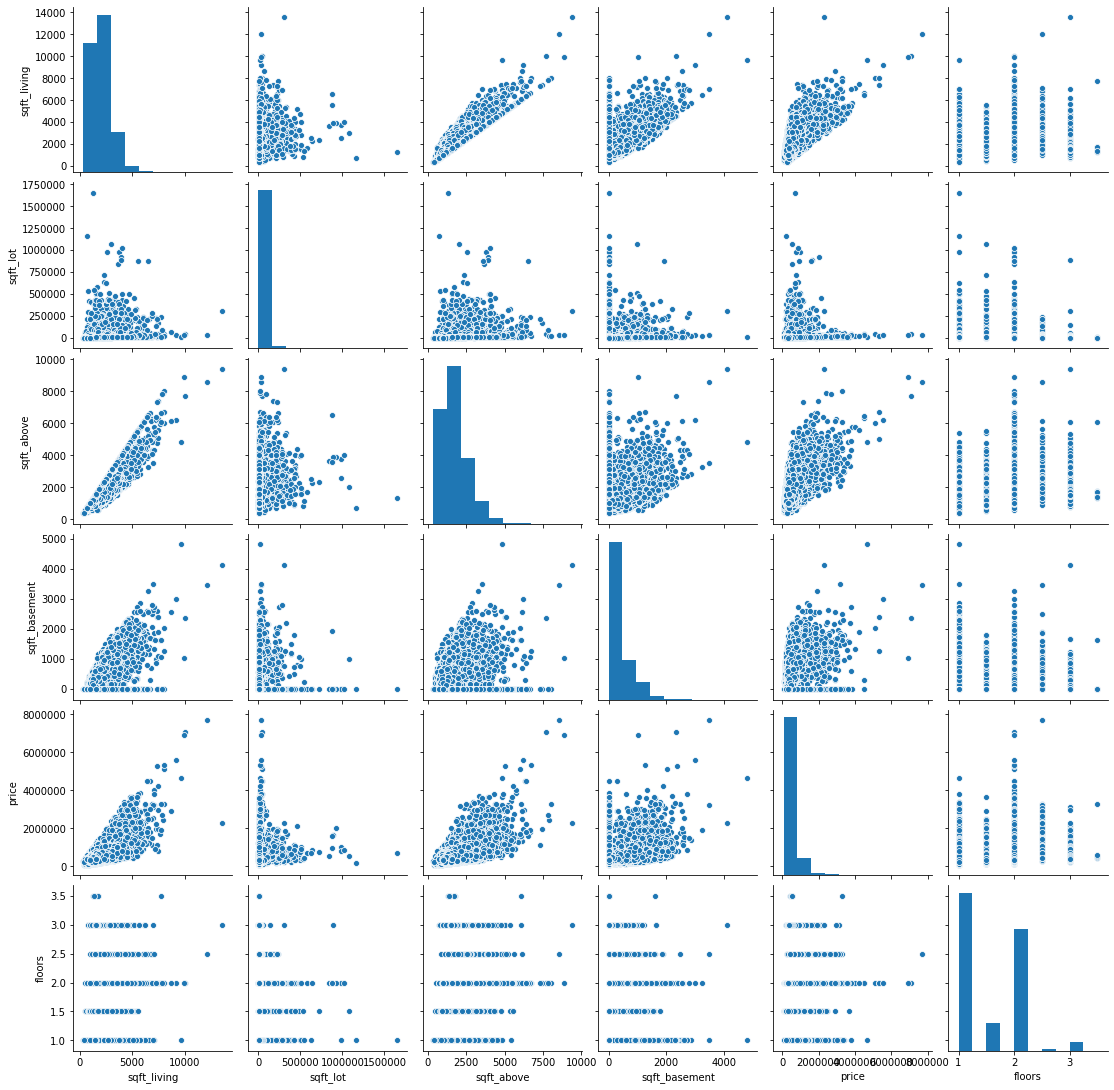

In [425]:
property_df =pd.DataFrame(KCHsales_df["sqft_living"])
property_df["sqft_lot"] = KCHsales_df["sqft_lot"]
property_df["sqft_above"] = KCHsales_df["sqft_above"] 
property_df["sqft_basement"] = KCHsales_df["sqft_basement2"]
property_df["price"] = KCHsales_df["price"]
property_df["floors"] = KCHsales_df["floors"]
sns.pairplot(property_df)

- it looks like sqft_above and sqft_living have a linear relationship to the price 
- but sqft_above and sqft_living correlate with each other too
- the variable sqft_lot has a negative effect on the price 

## column "view"

In [426]:
KCHsales_df[["view"]].describe()

,view
count,21597.000000
mean,0.233181
std,0.764673
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


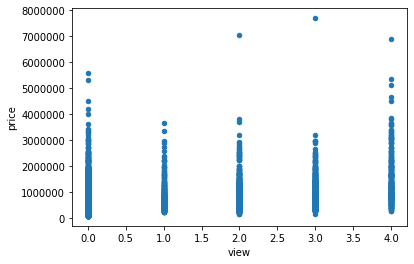

In [427]:
KCHsales_df.plot(x="view", y="price", kind="scatter");

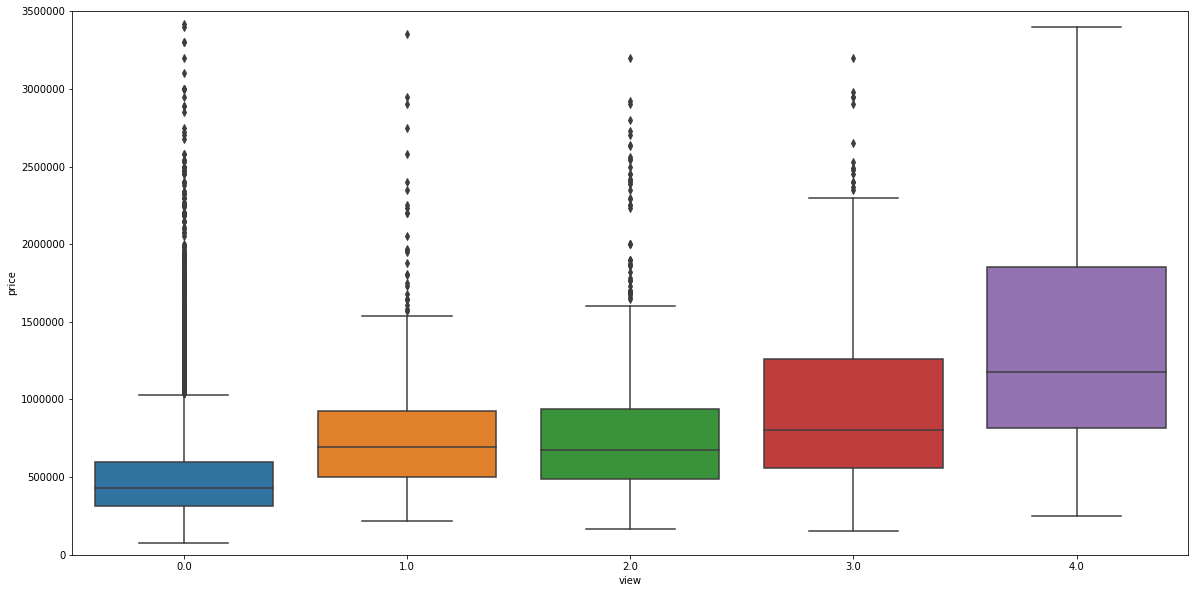

In [428]:
data = pd.concat([KCHsales_df["price"], KCHsales_df["view"]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x="view", y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

In [429]:
KCHsales_df[["view", "price"]].corr()

,view,price
view,1.000000,0.393497
price,0.393497,1.000000


In [502]:
dummy_view = pd.get_dummies(KCHsales_df["view"], prefix = "view")
dummy_view_test= pd.concat([dummy_view], axis = 1)
dummy_view_test["view_yes"] = dummy_view_test["view_1.0"] + dummy_view_test["view_2.0"] +dummy_view_test["view_3.0"] +dummy_view_test["view_4.0"]
dummy_view_test.head(15)

,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0,view_yes
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
6,1,0,0,0,0,0
7,1,0,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


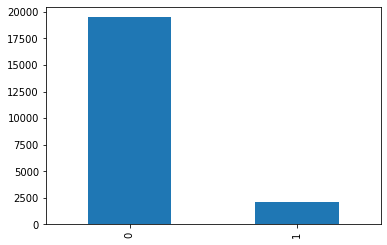

In [504]:
pd.value_counts(dummy_view_test["view_yes"]).sort_index().plot.bar();

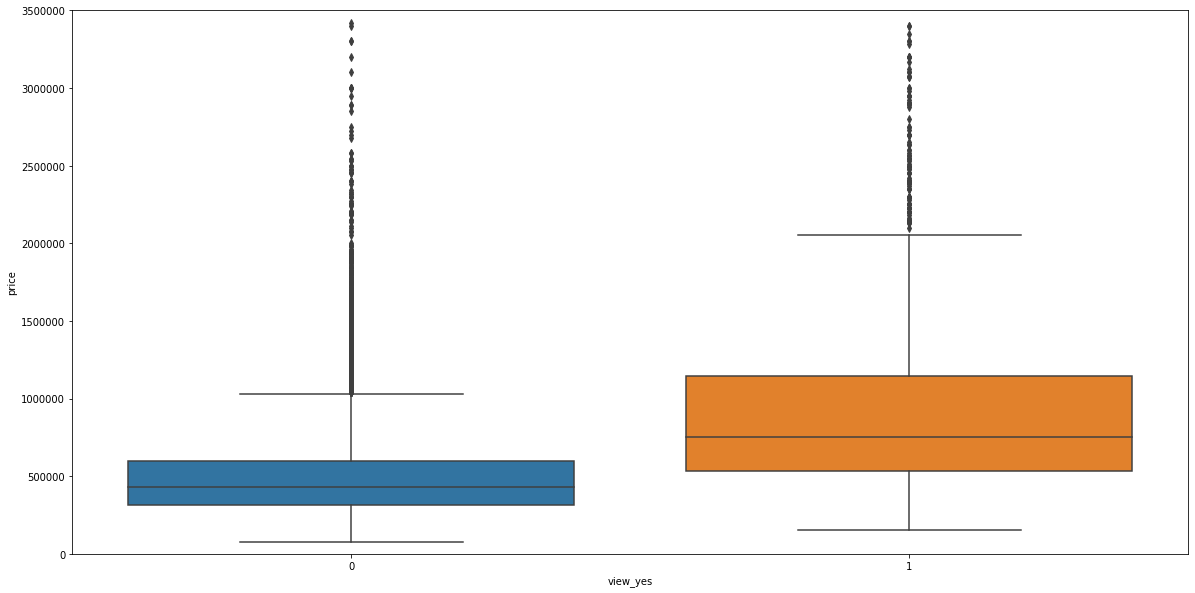

In [505]:
KCHsales_df["view_yes"] = dummy_view_test["view_yes"]
data = pd.concat([KCHsales_df["price"], KCHsales_df["view_yes"]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x="view_yes", y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

## column waterfront

In [432]:
KCHsales_df["waterfront"].nunique()

2

In [433]:
KCHsales_df[["waterfront", "price"]].corr()

,waterfront,price
waterfront,1.000000,0.264306
price,0.264306,1.000000


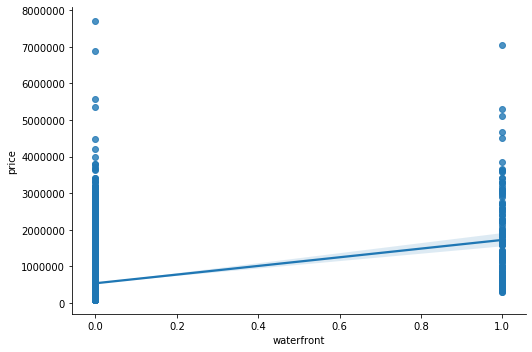

In [434]:
sns.lmplot("waterfront", "price", data=KCHsales_df, aspect=1.5);

- there is a connection between price and waterfront

## column condition

In [435]:
KCHsales_df["condition"].min()
KCHsales_df["condition"].describe()
KCHsales_df["condition"].nunique()

5

In [436]:
X5 = KCHsales_df[["condition"]]
X5 = sms.add_constant(X5)

y5= KCHsales_df[["price"]]

model5 = sms.OLS(y5, X5)
results5 = model5.fit()
results5.summary()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.11
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           1.16e-07
Time:                        22:48:29   Log-Likelihood:            -3.0738e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.709e+05   1.33e+04     35.322      0.000    4.45e+05    4.97e+05
condition   2.036e+04   3840.295      5.302      0.000    1.28e+04    2.79e+04
==============================================================================
Omnibus:                    19113.390   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1136802.126
Skew:                           4.025   Prob(JB):                         0.00
Kurtosis:                      37.619   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0, 7)

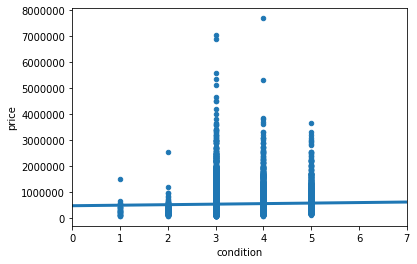

In [437]:
intercept, slope = results5.params
ax = KCHsales_df.plot("condition", "price", kind="scatter")
xx = np.linspace(0, 100, 100)
ax.plot(xx, xx*slope + intercept, lw=3)
ax.set_xlim([0, 7])

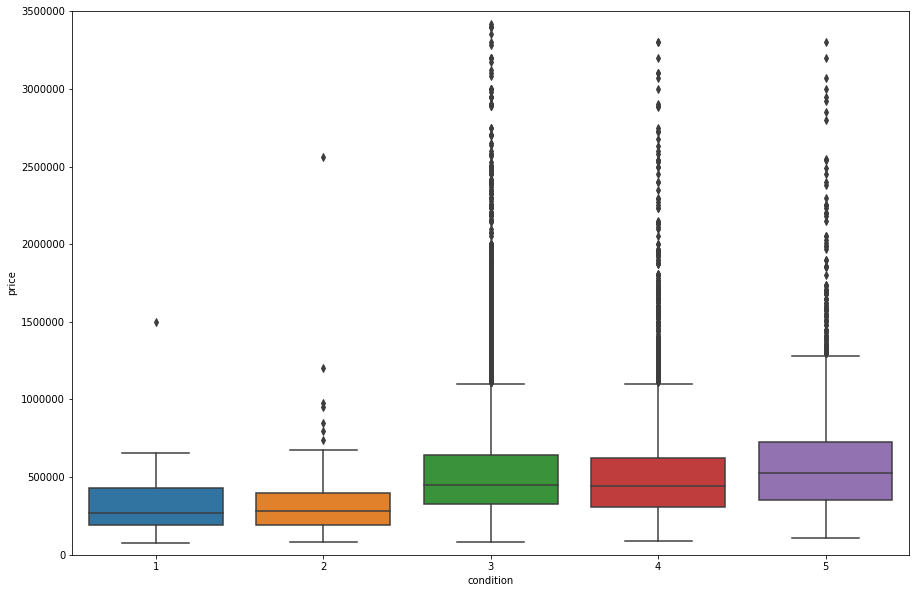

In [438]:
data = pd.concat([KCHsales_df["price"], KCHsales_df["condition"]], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x="condition", y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

## column grade

In [439]:
print(KCHsales_df["grade"].min())
print(KCHsales_df["grade"].max())
KCHsales_df["grade"].nunique()

3
13


11

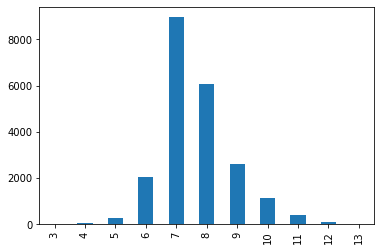

In [440]:
pd.value_counts(KCHsales_df["grade"]).sort_index().plot.bar();

In [441]:
X7 = KCHsales_df[["grade"]]
X7 = sms.add_constant(X7)

y7= KCHsales_df[["price"]]

model7 = sms.OLS(y7, X7)
results7 = model7.fit()
results7.summary()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:48:30   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(1, 15)

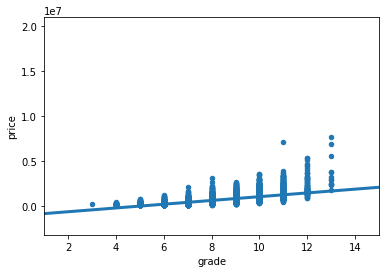

In [442]:
intercept, slope = results7.params
ax = KCHsales_df.plot("grade", "price", kind="scatter")
xx = np.linspace(-5, 100, 100)
ax.plot(xx, xx*slope + intercept, lw=3)
ax.set_xlim([1, 15])

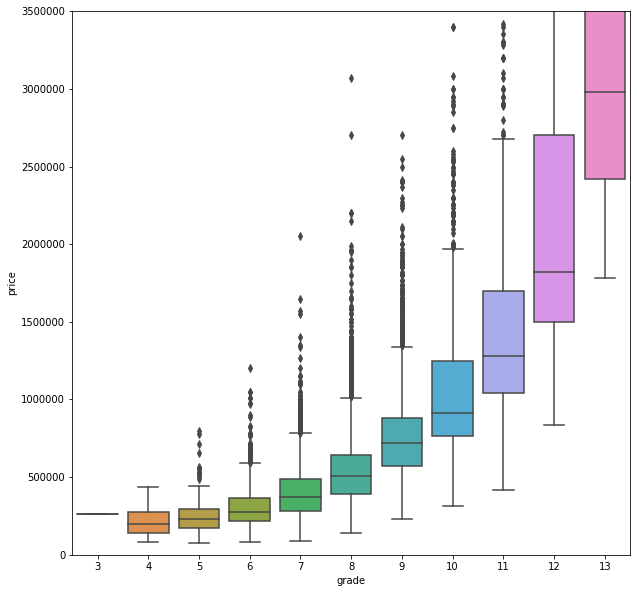

In [443]:
data = pd.concat([KCHsales_df["grade"], KCHsales_df["price"]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x="grade", y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

## column yr_built

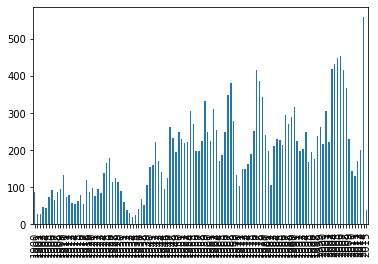

In [520]:
pd.value_counts(KCHsales_df["yr_built"]).sort_index().plot.bar();

In [445]:
KCHsales_df["yr_built"].unique()
KCHsales_df["yr_built"].min()
KCHsales_df["yr_built"].max()

2015

In [446]:
X8 = KCHsales_df[["yr_built"]]
X8 = sms.add_constant(X8)

y8= KCHsales_df[["price"]]

model8 = sms.OLS(y8, X8)
results8 = model8.fit()
results8.summary()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     63.05
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           2.12e-15
Time:                        22:48:31   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.896e+05   1.68e+05     -4.714      0.000   -1.12e+06   -4.61e+05
yr_built     674.7431     84.979      7.940      0.000     508.178     841.308
==============================================================================
Omnibus:                    19135.901   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1142512.023
Skew:                           4.031   Prob(JB):                         0.00
Kurtosis:                      37.708   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(1870, 2020)

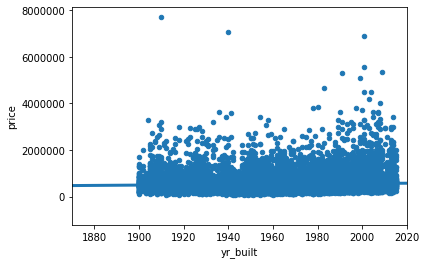

In [447]:
intercept, slope = results8.params
ax = KCHsales_df.plot("yr_built", "price", kind="scatter")
xx = np.linspace(-5, 2050, 100)
ax.plot(xx, xx*slope + intercept, lw=3)
ax.set_xlim([1870, 2020])

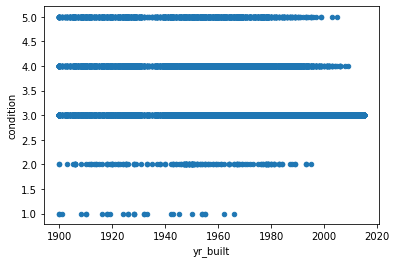

In [448]:
KCHsales_df.plot(y= "condition", x= "yr_built", kind="scatter");

In [449]:
KCHsales_df[["condition", "yr_built"]].corr()

,condition,yr_built
condition,1.000000,-0.361592
yr_built,-0.361592,1.000000


In [510]:
KCHsales_df["yr_built"].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [518]:
yr_built_bins = np.arange(0, 3)
yr_built_series = pd.cut(KCHsales_df["yr_built"], bins=yr_built_bins, 
                              labels=yr_built_bins[:-1])
yr_built_series.name = "yr_built_bins"
KCHsales_df = pd.concat([KCHsales_df, yr_built_series], axis=1)
KCHsales_df

,id,price,bedrooms,bathrooms_per_bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_sale,mth_sale,total_bathrooms,sqft_basement2,reno_0.0,view_yes,yr_built_bins,yr_built_bins,yr_built_bins,yr_built_bins
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,2014,10,3.00,0,1,0,1954,1954,1954,NaN
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2014,12,6.75,400,0,0,1950,1950,1950,NaN
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,2015,2,2.00,0,1,0,1932,1932,1932,NaN
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,2014,12,12.00,910,1,0,1964,1964,1964,NaN
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,2015,2,6.00,0,1,0,1986,1986,1986,NaN
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,2014,5,18.00,1530,1,0,2000,2000,2000,NaN
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,2014,6,6.75,0,1,0,1994,1994,1994,NaN
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,...,2015,1,4.50,0,1,0,1962,1962,1962,NaN
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,2015,4,3.00,730,1,0,1959,1959,1959,NaN
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,...,2015,3,7.50,0,1,0,2002,2002,2002,NaN


In [450]:
dummy_yr_built = pd.get_dummies(KCHsales_df["yr_built"], prefix = "yr_built", drop_first = True)
dummy_yr_built_df = pd.concat([KCHsales_df["price"], dummy_yr_built], axis = 1)
dummy_yr_built_df.head()

,price,yr_built_1901,yr_built_1902,yr_built_1903,yr_built_1904,yr_built_1905,yr_built_1906,yr_built_1907,yr_built_1908,yr_built_1909,...,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014,yr_built_2015
0,221900.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [451]:
dummy_yr_built_df.columns

Index(['price', 'yr_built_1901', 'yr_built_1902', 'yr_built_1903',
       'yr_built_1904', 'yr_built_1905', 'yr_built_1906', 'yr_built_1907',
       'yr_built_1908', 'yr_built_1909',
       ...
       'yr_built_2006', 'yr_built_2007', 'yr_built_2008', 'yr_built_2009',
       'yr_built_2010', 'yr_built_2011', 'yr_built_2012', 'yr_built_2013',
       'yr_built_2014', 'yr_built_2015'],
      dtype='object', length=116)

In [452]:
X_yr_built = dummy_yr_built
X_yr_built = sms.add_constant(X_yr_built)

y_yr_built= dummy_yr_built_df[["price"]]

model_yr_built = sms.OLS(y_yr_built, X_yr_built)
results_yr_built = model_yr_built.fit()
results_yr_built.summary()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     9.903
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          6.74e-163
Time:                        22:48:32   Log-Likelihood:            -3.0683e+05
No. Observations:               21597   AIC:                         6.139e+05
Df Residuals:                   21481   BIC:                         6.148e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.815e+05   3.85e+04     15.111      0.000    5.06e+05    6.57e+05
yr_built_1901 -2.443e+04    7.7e+04     -0.317      0.751   -1.75e+05    1.26e+05
yr_built_1902  9.166e+04   7.91e+04      1.159      0.246   -6.33e+04    2.47e+05
yr_built_1903 -1.006e+05   6.54e+04     -1.537      0.124   -2.29e+05    2.77e+04
yr_built_1904  2331.1234   6.59e+04      0.035      0.972   -1.27e+05    1.32e+05
yr_built_1905  1.719e+05   5.68e+04      3.028      0.002    6.06e+04    2.83e+05
yr_built_1906  8.849e+04   5.37e+04      1.648      0.099   -1.67e+04    1.94e+05
yr_built_1907  9.479e+04   5.89e+04      1.611      0.107   -2.06e+04     2.1e+05
yr_built_1908 -1.704e+04   5.46e+04     -0.312      0.755   -1.24e+05    8.99e+04
yr_built_1909  1.149e+05   5.34e+04      2.152      0.031    1.02e+04     2.2e+05
yr_built_1910  9.014e+04   4.94e+04      1.824      0.068   -6737.151    1.87e+05
yr_built_1911  5.105e+04    5.7e+04      0.896      0.370   -6.06e+04    1.63e+05
yr_built_1912  3.166e+04   5.58e+04      0.567      0.570   -7.77e+04    1.41e+05
yr_built_1913  1.222e+04   6.08e+04      0.201      0.841   -1.07e+05    1.31e+05
yr_built_1914  3.371e+04   6.22e+04      0.542      0.588   -8.82e+04    1.56e+05
yr_built_1915  3500.2897   5.91e+04      0.059      0.953   -1.12e+05    1.19e+05
yr_built_1916   1.95e+04   5.58e+04      0.350      0.727   -8.98e+04    1.29e+05
yr_built_1917 -5.341e+04   6.15e+04     -0.868      0.385   -1.74e+05    6.71e+04
yr_built_1918 -8.919e+04   5.05e+04     -1.765      0.078   -1.88e+05    9882.183
yr_built_1919 -4.365e+04   5.43e+04     -0.804      0.421    -1.5e+05    6.27e+04
yr_built_1920 -1.038e+05   5.29e+04     -1.963      0.050   -2.07e+05    -135.234
yr_built_1921  3.169e+04   5.64e+04      0.562      0.574   -7.88e+04    1.42e+05
yr_built_1922 -1.174e+04   5.33e+04     -0.220      0.826   -1.16e+05    9.27e+04
yr_built_1923  3.712e+04   5.49e+04      0.676      0.499   -7.05e+04    1.45e+05
yr_built_1924 -1.112e+04   4.91e+04     -0.227      0.821   -1.07e+05    8.51e+04
yr_built_1925  2.578e+04   4.76e+04      0.542      0.588   -6.74e+04    1.19e+05
yr_built_1926  4.391e+04   4.69e+04      0.937      0.349    -4.8e+04    1.36e+05
yr_built_1927  7.262e+04    5.1e+04      1.424      0.155   -2.74e+04    1.73e+05
yr_built_1928  4.038e+04      5e+04      0.807      0.420   -5.77e+04    1.38e+05
yr_built_1929 -7139.7901   5.11e+04     -0.140      0.889   -1.07e+05     9.3e+04
yr_built_1930  1.912e+04    5.4e+04      0.354      0.723   -8.67e+04    1.25e+05
yr_built_1931  8.024e+04   5.99e+04      1.339      0.181   -3.73e+04    1.98e+05
yr_built_1932  -1.23e+05   6.98e+04     -1.763      0.078    -2.6e+05    1.38e+04
yr_built_1933  1.909e+05    7.6e+04      2.512      0.012     4.2e+04     3.4e+05
yr_built_1934 -6.438e+04   8.73e+04     -0.738   

## column yr_renovated

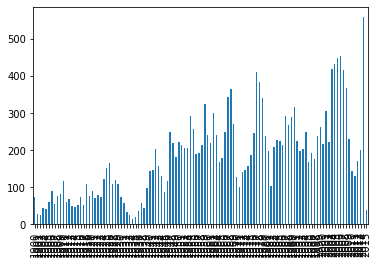

In [453]:
pd.value_counts(KCHsales_df["yr_built"][KCHsales_df["yr_renovated"] <= 0.0]).sort_index().plot.bar();

In [454]:
dummy_renovated = pd.get_dummies(KCHsales_df["yr_renovated"], prefix = "reno")
KCHsales_df = pd.concat([KCHsales_df, dummy_renovated["reno_0.0"]], axis =1)
KCHsales_df.head()

,id,price,bedrooms,bathrooms_per_bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sale,mth_sale,total_bathrooms,sqft_basement2,reno_0.0
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,98178,47.5112,-122.257,1340,5650,2014,10,3.00,0,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,98125,47.7210,-122.319,1690,7639,2014,12,6.75,400,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,98028,47.7379,-122.233,2720,8062,2015,2,2.00,0,1
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,98136,47.5208,-122.393,1360,5000,2014,12,12.00,910,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,98074,47.6168,-122.045,1800,7503,2015,2,6.00,0,1


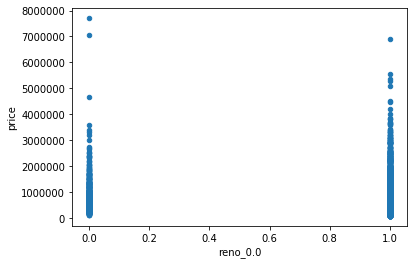

In [455]:
KCHsales_df.plot("reno_0.0","price", kind="scatter")

In [456]:
X10 = KCHsales_df[["reno_0.0"]]
X10 = sms.add_constant(X10)

y10= KCHsales_df[["price"]]

model10 = sms.OLS(y10, X10)
results10 = model10.fit()
results10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     302.5
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           2.64e-67
Time:                        22:48:34   Log-Likelihood:            -3.0724e+05
No. Observations:               21597   AIC:                         6.145e+05
Df Residuals:                   21595   BIC:                         6.145e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.689e+05   1.34e+04     57.487      0.000    7.43e+05    7.95e+05
reno_0.0   -2.368e+05   1.36e+04    -17.394      0.000   -2.63e+05    -2.1e+05
==============================================================================
Omnibus:                    18903.581   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1076744.153
Skew:                           3.969   Prob(JB):                         0.00
Kurtosis:                      36.668   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(-1, 2)

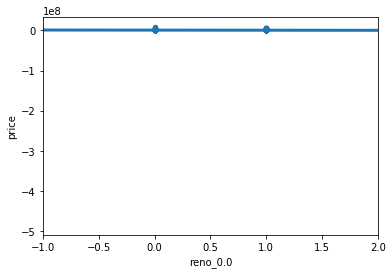

In [457]:
intercept, slope = results10.params
ax = KCHsales_df.plot("reno_0.0", "price", kind="scatter")
xx = np.linspace(-5, 2050, 100)
ax.plot(xx, xx*slope + intercept, lw=3)
ax.set_xlim([-1, 2])

## columns enviroment

In [458]:
KCHsales_df["sqft_living15"].head(15)

0     1340
1     1690
2     2720
3     1360
4     1800
5     4760
6     2238
7     1650
8     1780
9     2390
10    2210
11    1330
12    1780
13    1370
14    1360
Name: sqft_living15, dtype: int64

In [459]:
KCHsales_df["sqft_lot15"].head(15)

0       5650
1       7639
2       8062
3       5000
4       7503
5     101930
6       6819
7       9711
8       8113
9       7570
10      8925
11      6000
12     12697
13     10208
14      4850
Name: sqft_lot15, dtype: int64

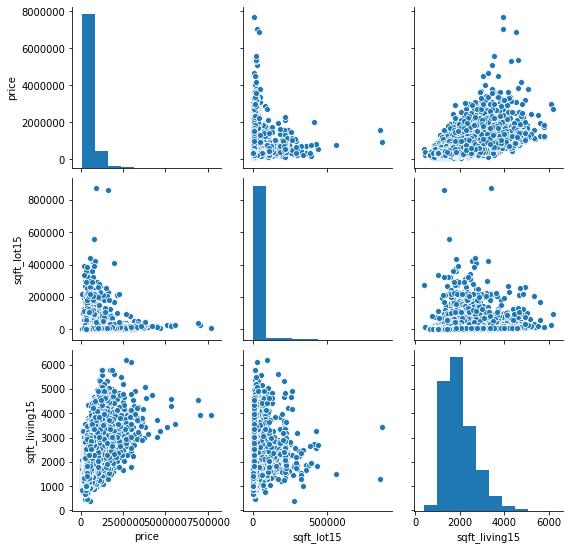

In [460]:
sns.pairplot(KCHsales_df[["price", "sqft_lot15", "sqft_living15"]])

In [461]:
X9 = KCHsales_df[["sqft_living15", "sqft_lot15"]]
X9 = sms.add_constant(X9)

y9= KCHsales_df[["price"]]

model9 = sms.OLS(y9, X9)
results9 = model9.fit()
results9.summary()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     5640.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:48:37   Log-Likelihood:            -3.0285e+05
No. Observations:               21597   AIC:                         6.057e+05
Df Residuals:                   21594   BIC:                         6.057e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.363e+04   6215.264    -13.455      0.000   -9.58e+04   -7.14e+04
sqft_living15   316.2617      3.008    105.140      0.000     310.366     322.158
sqft_lot15       -0.3423      0.076     -4.529      0.000      -0.490      -0.194
==============================================================================
Omnibus:                    20142.199   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1912868.269
Skew:                           4.207   Prob(JB):                         0.00
Kurtosis:                      48.331   Cond. No.                     9.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## column "zip_code"

In [462]:
KCHsales_df["zipcode"].head(15)

0     98178
1     98125
2     98028
3     98136
4     98074
5     98053
6     98003
7     98198
8     98146
9     98038
10    98007
11    98115
12    98028
13    98074
14    98107
Name: zipcode, dtype: int64

In [463]:
print(KCHsales_df["price"].mean())
[KCHsales_df.groupby("zipcode").mean().head()]

540296.5735055795


[                   id         price  bedrooms  bathrooms_per_bedrooms  \
 zipcode                                                                 
 98001    4.651274e+09  2.811949e+05  3.393352                2.011773   
 98002    4.850894e+09  2.342840e+05  3.326633                1.839196   
 98003    4.674182e+09  2.941113e+05  3.357143                2.047321   
 98004    4.394237e+09  1.356524e+06  3.854890                2.527603   
 98005    4.961872e+09  8.102897e+05  3.851190                2.424107   
 
          sqft_living      sqft_lot    floors  waterfront      view  condition  \
 zipcode                                                                         
 98001    1903.783934  14967.002770  1.430748    0.000000  0.094183   3.335180   
 98002    1627.743719   7517.633166  1.334171    0.000000  0.010050   3.743719   
 98003    1928.882143  10603.096429  1.310714    0.000000  0.214286   3.371429   
 98004    2909.022082  13104.220820  1.432177    0.003155  0.305994   

In [464]:
KCHsales_df["price"].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [465]:
KCHsales_df["price"].quantile(0.25)

322000.0

In [490]:
df_zipcode = KCHsales_df.groupby("zipcode").mean()
df_zipcode.reset_index(inplace=True)
df_zipcode.head()

,zipcode,id,price,bedrooms,bathrooms_per_bedrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,lat,long,sqft_living15,sqft_lot15,yr_sale,mth_sale,total_bathrooms,sqft_basement2,reno_0.0
0,98001,4.651274e+09,2.811949e+05,3.393352,2.011773,1903.783934,14967.002770,1.430748,0.000000,0.094183,...,22.058172,47.309106,-122.270704,1830.099723,11218.875346,2014.321330,6.567867,7.031856,180.027701,0.988920
1,98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,0.010050,...,49.924623,47.308780,-122.213357,1479.030151,7585.482412,2014.336683,6.698492,6.525126,105.206030,0.974874
2,98003,4.674182e+09,2.941113e+05,3.357143,2.047321,1928.882143,10603.096429,1.310714,0.000000,0.214286,...,14.264286,47.315741,-122.310054,1876.196429,9746.178571,2014.342857,6.621429,7.071429,265.332143,0.992857
3,98004,4.394237e+09,1.356524e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,0.305994,...,176.671924,47.616183,-122.205189,2674.700315,12805.022082,2014.337539,6.353312,10.258675,489.179811,0.911672
4,98005,4.961872e+09,8.102897e+05,3.851190,2.424107,2656.803571,19928.785714,1.279762,0.000000,0.095238,...,47.630952,47.611532,-122.167268,2567.863095,18367.773810,2014.297619,6.922619,9.522321,496.607143,0.976190


## column "lat" and "long"

In [466]:
KCHsales_df[["lat", "long"]]

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045
5,47.6561,-122.005
6,47.3097,-122.327
7,47.4095,-122.315
8,47.5123,-122.337
9,47.3684,-122.031


In [467]:
#sns.pairplot(KCHsales_df)

In [468]:
#sns.heatmap(KCHsales_df.corr(), linewidths = 1.5, square=True)

In [532]:
map_data_shp.head()
type(map_data_shp)

geopandas.geodataframe.GeoDataFrame

# multivariate linear regression

In [469]:
KCHsales_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms_per_bedrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sale', 'mth_sale', 'total_bathrooms',
       'sqft_basement2', 'reno_0.0'],
      dtype='object')

In [470]:
KCHsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
id                        21597 non-null int64
price                     21597 non-null float64
bedrooms                  21597 non-null int64
bathrooms_per_bedrooms    21597 non-null float64
sqft_living               21597 non-null int64
sqft_lot                  21597 non-null int64
floors                    21597 non-null float64
waterfront                21597 non-null float64
view                      21597 non-null float64
condition                 21597 non-null int64
grade                     21597 non-null int64
sqft_above                21597 non-null int64
yr_built                  21597 non-null int64
yr_renovated              21597 non-null float64
zipcode                   21597 non-null int64
lat                       21597 non-null float64
long                      21597 non-null float64
sqft_living15             21597 non-null int64
sqft_lot15                215

In [595]:
best_variable = ["grade", "lat", "sqft_living", "sqft_living15"]

XX = KCHsales_df[best_variable]
XX = sm.add_constant(XX)
yy = KCHsales_df["price_log"]

modelXy = sm.OLS(yy, XX)
resultsXy = modelXy.fit()
resultsXy.summary()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 1.310e+04
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:42:01   Log-Likelihood:                -3492.4
No. Observations:               21597   AIC:                             6995.
Df Residuals:                   21592   BIC:                             7035.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -59.0581      0.668    -88.379      0.000     -60.368     -57.748
grade             0.1390      0.003     51.189      0.000       0.134       0.144
lat               1.4813      0.014    105.152      0.000       1.454       1.509
sqft_living       0.0002   3.69e-06     55.103      0.000       0.000       0.000
sqft_living15  8.531e-05   4.57e-06     18.683      0.000    7.64e-05    9.43e-05
==============================================================================
Omnibus:                      471.931   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.773
Skew:                           0.263   Prob(JB):                    2.18e-141
Kurtosis:                       3.665   Cond. No.                     1.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Root mean squared error (RMSE)

In [576]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [577]:
X = KCHsales_df[best_variable]
y = KCHsales_df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

In [578]:
linereg =LinearRegression()
linereg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [579]:
print(linereg.coef_)
print(linereg.intercept_)
zip(best_variable, linereg.coef_)

[7.45176180e+04 6.45311077e+05 1.89498770e+02 2.92074215e+01]
-31170202.916522656


In [580]:
y_pred = linereg.predict(X_test)
y_pred

array([873650.77630695, 274505.58000983, 274505.58000983, ...,
       287694.25521937, 444857.92059787, 287500.66189622])

In [581]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

227581.41941803505
